<a href="https://colab.research.google.com/github/james-monahan/Stats_Calc_Workshop/blob/main/Math10_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
import scipy.stats as stats

#Numpy Simulations
---



In [2]:
def toss_die():
    outcome = np.random.randint(1, 7)
    return outcome

In [3]:
for x in range(10):
    print(toss_die(), end= " ")

5 2 6 4 4 2 4 2 6 1 

In [4]:
np.random.seed(123)
for x in range(10):
    print(toss_die(), end=', ')

6, 3, 5, 3, 2, 4, 3, 4, 2, 2, 

In [5]:
students = ['student_' + str(i) for i in range(1,31)]

In [6]:
sample_students = np.random.choice(a=students, size=4,\
                                   replace=False)
sample_students

array(['student_9', 'student_27', 'student_23', 'student_14'],
      dtype='<U10')

In [7]:
sample_students2 = np.random.choice(a=students, \
                                    size=12, replace=True)
for i, s in enumerate(sample_students2):
    print(f'Week {i+1}: {s}')

Week 1: student_29
Week 2: student_29
Week 3: student_21
Week 4: student_7
Week 5: student_2
Week 6: student_22
Week 7: student_23
Week 8: student_28
Week 9: student_3
Week 10: student_2
Week 11: student_13
Week 12: student_9


In [8]:
suits = ['hearts', 'diamonds', 'spades', 'clubs']
ranks = ['Ace', '2', '3', '4', '5', '6', '7', '8', \
         '9', '10', 'Jack', 'Queen', 'King']

In [9]:
cards = [rank + '-' + suit for rank in ranks for suit in suits]

In [10]:
print(np.random.choice(cards, size=5, replace=False)) 

['Jack-clubs' '9-diamonds' 'Jack-hearts' '2-hearts' '9-clubs']


In [11]:
def deal_hands():
    drawn_cards = np.random.choice(cards, size=10, \
                                   replace=False)
    hand_1 = drawn_cards[:5].tolist()
    hand_2 = drawn_cards[5:].tolist()
    return hand_1, hand_2

deal_hands()

(['7-spades', 'King-hearts', 'Ace-spades', 'Jack-hearts', 'Jack-spades'],
 ['King-spades', '9-spades', '9-diamonds', '8-diamonds', '8-spades'])

In [12]:
def deal_hands2():
    drawn_cards = np.random.choice(cards, size=10, \
                                   replace=True)
    hand_1 = drawn_cards[:5].tolist()
    hand_2 = drawn_cards[5:].tolist()
    return hand_1, hand_2

np.random.seed(2)
deal_hands2()

(['Jack-hearts', '4-clubs', 'Queen-diamonds', '3-hearts', '6-spades'],
 ['Jack-clubs', '5-spades', '3-clubs', 'Jack-hearts', '2-clubs'])

#Relative Frequency

In [13]:
np.random.seed(81)
one_million_tosses = np.random.randint(low=1, \
                                       high=7, size=int(1e6))

In [14]:
one_million_tosses[:10]

array([4, 2, 1, 4, 4, 4, 2, 2, 6, 3])

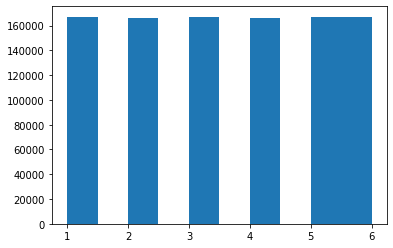

In [15]:
plt.hist(one_million_tosses)
plt.show()

In [16]:
N_A_occurs = (one_million_tosses == 2).sum()
Prob_A = N_A_occurs/one_million_tosses.shape[0]
print(f'P(A)={Prob_A}')

P(A)=0.16595


In [17]:
N_B_occurs = (one_million_tosses == 6).sum()
Prob_B = N_B_occurs/one_million_tosses.shape[0]
print(f'P(B)={Prob_B}')

P(B)=0.166809


In [18]:
N_odd_number = (
    (one_million_tosses == 1) | 
    (one_million_tosses == 3) | 
    (one_million_tosses == 5)).sum()
Prob_C = N_odd_number/one_million_tosses.shape[0]
print(f'P(C)={Prob_C}')

P(C)=0.501162


In [19]:
N_D_occurs = (one_million_tosses < 5).sum()
Prob_D = N_D_occurs/one_million_tosses.shape[0]
print(f'P(D)={Prob_D}')

P(D)=0.666004


In [20]:
np.random.seed(55)
number_of_tosses = int(1e5)
die_1 = np.random.randint(1,7, size=number_of_tosses)
die_2 = np.random.randint(1,7, size=number_of_tosses)
X = die_1 + die_2

In [21]:
print(die_1[:10])
print(die_2[:10])
print(X[:10])

[6 3 1 6 6 6 6 6 4 2]
[1 2 3 5 1 3 3 6 3 1]
[ 7  5  4 11  7  9  9 12  7  3]


In [22]:
Prob_X_is_10 = (X == 10).sum()/X.shape[0]
print(f'P(X = 10) = {Prob_X_is_10}')

P(X = 10) = 0.08329


In [23]:
Prob_X_is_gt_5 = (X > 5).sum()/X.shape[0]
print(f'P(X > 5) = {Prob_X_is_gt_5}')

P(X > 5) = 0.72197


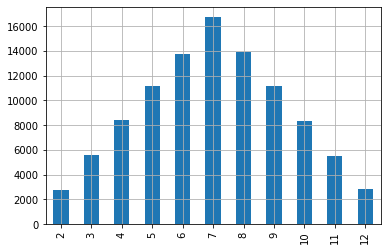

In [24]:
X = pd.Series(X)
# counts the occurrences of each value
freq_of_X_values = X.value_counts()
freq_of_X_values.sort_index().plot(kind='bar')
plt.grid()

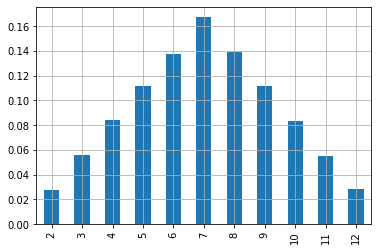

In [25]:
Prob_of_X_values = freq_of_X_values/X.shape[0]
Prob_of_X_values.sort_index().plot(kind='bar')
plt.grid()

In [26]:
np.random.seed(97)
ten_coins_a_million_times = np.random.randint(0, 2, \
                                              size=int(10e6))\
                                              .reshape(-1,10) 

In [27]:
ten_coins_a_million_times[:12, :]

array([[0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
       [0, 0, 1, 1, 1, 0, 1, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0, 0, 1],
       [1, 0, 1, 1, 0, 1, 0, 0, 1, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 0, 0],
       [0, 1, 1, 1, 0, 1, 1, 1, 1, 0],
       [1, 1, 1, 1, 0, 1, 0, 1, 0, 1],
       [0, 1, 0, 0, 1, 1, 1, 0, 0, 0],
       [1, 0, 0, 1, 1, 1, 0, 0, 0, 0],
       [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
       [1, 0, 1, 1, 1, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 1, 1]])

In [28]:
Y = ten_coins_a_million_times.sum(axis=1)

In [29]:
Prob_Y_is_0 = (Y == 0).sum() / Y.shape[0]
print(f'P(Y = 0) = {Prob_Y_is_0}')

P(Y = 0) = 0.000986


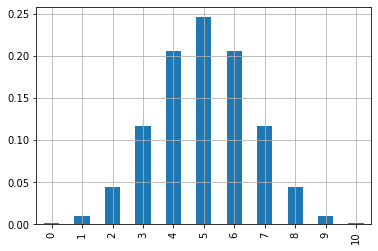

In [30]:
Y = pd.Series(Y)
# counts the occurrences of each value
freq_of_Y_values = Y.value_counts()
Prob_of_Y_values = freq_of_Y_values/Y.shape[0]
Prob_of_Y_values.sort_index().plot(kind='bar')
plt.grid()

In [31]:
print(Prob_of_Y_values.loc[[4,5,6]])
print(f'P(4<=Y<=6) = {Prob_of_Y_values.loc[[4,5,6]].sum()}')

4    0.205283
5    0.246114
6    0.205761
dtype: float64
P(4<=Y<=6) = 0.657158


#Roulette Simulation

In [32]:
def roulette(number_of_games=1):
    
    # generate the Roulette numbers
    roulette_numbers = np.arange(0, 37)
    
    outcome = np.random.choice(a = roulette_numbers, \
                               size = number_of_games,\
                               replace = True)
    return outcome

In [33]:
def payoff(outcome, units=1):
    # 1. Bet m units on the numbers from 19 to 36
    # 2. If the outcome of the roulette is any of the 
    #    selected numbers, then you win m units
    if outcome > 18:
        pay = units
    else:
    # 3. If the outcome of the roulette is any number 
    #    between 0 and 18 (inclusive) then you lose m units
        pay = -units
    return pay

In [34]:
payoff = np.vectorize(payoff)

In [35]:
outcomes = roulette(20)
payoffs = payoff(outcomes)
print(outcomes)
print(payoffs)

[ 4 35 32  4 23  4 36 23 36 26 11 26  3 30 10 26 35  6  0 22]
[-1  1  1 -1  1 -1  1  1  1  1 -1  1 -1  1 -1  1  1 -1 -1  1]


In [36]:
number_of_games = int(1e6)
outcomes = roulette(number_of_games)
payoffs = payoff(outcomes)

In [37]:
np.mean(payoffs)

-0.025488

#Discrete Random Variables

In [38]:
np.random.seed(977)
np.random.choice(['defective', 'good'], \
                 size=12, p=(0.04, 0.96))

array(['good', 'good', 'good', 'good', 'good', 'good', 'good',
       'defective', 'good', 'good', 'good', 'good'], dtype='<U9')

In [39]:
np.random.seed(10)
n_boxes = int(1e6)
parts_per_box = 12
one_million_boxes = np.random.choice\
                    ([1, 0], \
                     size=(n_boxes, parts_per_box), \
                     p=(0.04, 0.96))

In [40]:
one_million_boxes[:5,:]

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [41]:
# count defective pieces per box
defective_pieces_per_box = one_million_boxes.sum(axis=1)
# count how many times we observed 0, 1,…, 12 defective pieces
defective_pieces_per_box = pd.Series(defective_pieces_per_box)
frequencies = defective_pieces_per_box.value_counts()
# probability distribution
probs_Z = frequencies/n_boxes

0    0.612402
1    0.306383
2    0.070584
3    0.009630
4    0.000940
5    0.000056
6    0.000004
7    0.000001
dtype: float64


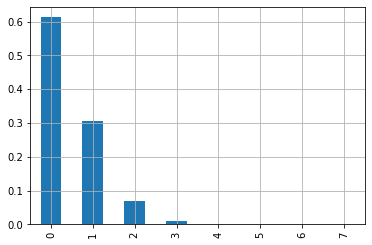

In [42]:
print(probs_Z.sort_index())
probs_Z.sort_index().plot(kind='bar')
plt.grid()

#Binomial Distribution

In [43]:
Y_rv = stats.binom(
    n = 10, # number of coins
    p = 0.5 # probability of heads (success)
)

In [44]:
y_values = np.arange(0,11)

In [45]:
Y_probs = Y_rv.pmf(y_values) 

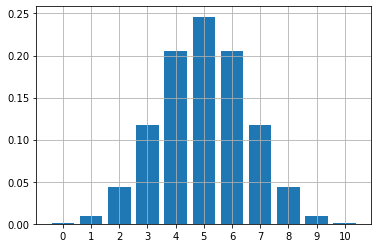

In [46]:
fig, ax = plt.subplots()
ax.bar(y_values, Y_probs)
ax.set_xticks(y_values)
ax.grid()

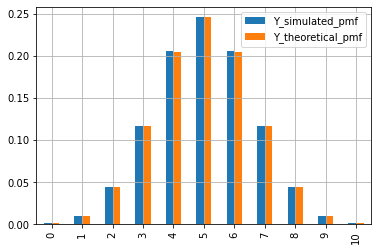

In [47]:
Y_rv_df = pd.DataFrame({'Y_simulated_pmf': Prob_of_Y_values,\
                        'Y_theoretical_pmf':  Y_probs},\
                        index=y_values)
Y_rv_df.plot(kind='bar')
plt.grid()

#Checking if Random Variable Follows Binomial Distribution

In [48]:
# number of parts per box
parts_per_box = 12
Z_rv = stats.binom\
       (n = parts_per_box,\
        p = 0.04 # probability of defective piece (success)
        )

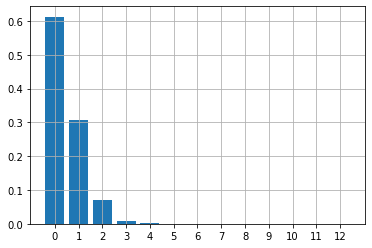

In [49]:
z_possible_values = np.arange(0, parts_per_box + 1)
Z_probs = Z_rv.pmf(z_possible_values)
fig, ax = plt.subplots()
ax.bar(z_possible_values, Z_probs)
ax.set_xticks(z_possible_values)
ax.grid()

#Continuous Random Variables

In [51]:
link = "https://raw.githubusercontent.com/PacktWorkshops/The-Statistics-and-Calculus-with-Python-Workshop/master/Chapter07/data/appstore_games.csv"

In [52]:
games = pd.read_csv(link)

In [53]:
original_colums_dict = {x: x.lower().replace(' ','_') \
                        for x in games.columns}
games.rename(columns = original_colums_dict, inplace = True)

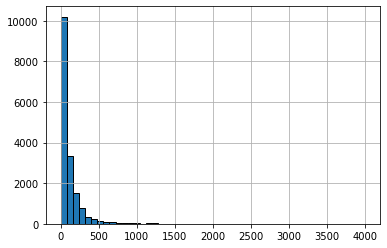

In [55]:
games['size'] = games['size']/(1e6)
# replacing the one missing value with the median
games['size'] = games['size'].fillna(games['size'].median())
games['size'].hist(bins = 50, ec='k')

In [58]:
# get the number of games to use as denominator
number_of_games = games['size'].size
# calculate probabilities
prob_X_gt_100 = (games['size'] > 100).sum()/number_of_games
prob_X_bt_100_and_400 = ((games['size'] >= 100) & \
                         (games['size'] <= 400))\
                         .sum()/number_of_games
prob_X_eq_152_53 = (games['size'] == 152.53).sum()/number_of_games
# print the results
print(f'P(X > 100) = {prob_X_gt_100:0.5f}')
print(f'P(100 <= X <= 400) = {prob_X_bt_100_and_400:0.5f}')
print(f'P(X = 152.53) = {prob_X_eq_152_53:0.5f}')

P(X > 100) = 0.33098
P(100 <= X <= 400) = 0.28306
P(X = 152.53) = 0.00000


In [59]:
# set the mu and sigma parameters of the distribution
heights_mean = 170
heights_sd = 10
# instantiate the random variable object
heights_rv = stats.norm(
        loc = heights_mean, # mean of the distribution
        scale = heights_sd  # standard deviation
)

In [68]:
heights_rv.pdf(175)

0.03520653267642995

In [69]:
values = np.linspace(130, 210, num=200)

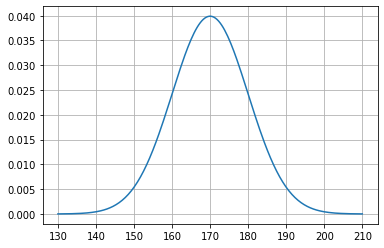

In [70]:
heights_rv_pdf = heights_rv.pdf(values)
plt.plot(values, heights_rv_pdf)
plt.grid()

In [73]:
sample_heighs = heights_rv.rvs(size = 5, random_state = 998)
for i, h in enumerate(sample_heighs):
    print(f'Men {i + 1} height: {h:0.1f}')

Men 1 height: 171.2
Men 2 height: 173.3
Men 3 height: 157.1
Men 4 height: 164.9
Men 5 height: 179.1


In [74]:
# size of the simulation
sim_size = int(1e5)
# simulate the random samples
sample_heights = heights_rv.rvs\
                 (size = sim_size,\
                  random_state = 88)
Prob_event = (sample_heights > 190).sum()/sim_size
print(f'Probability of a male > 190 cm: {Prob_event:0.5f} \
 (or {100*Prob_event:0.2f}%)')

Probability of a male > 190 cm: 0.02303  (or 2.30%)


In [76]:
# parameters of distributions
heights_means = [170, 170, 175]
heights_sds = [10, 5, 10]
countries = ['Country A', 'Country B', 'Country C']
heights_rvs = {}
plotting_values = {}
# creating the random variables
for i, country in enumerate(countries):
    heights_rvs[country] = stats.norm(
        loc = heights_means[i], # mean of the distribution
        scale = heights_sds[i]  # standard deviation
    )

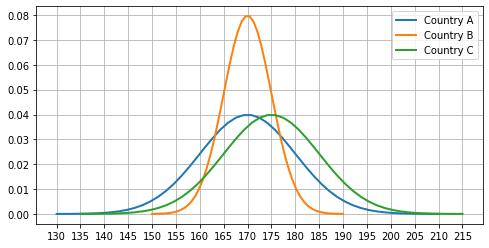

In [77]:
# getting x and y values for plotting the distributions
for i, country in enumerate(countries):
    x_values = np.linspace(heights_means[i] - 4*heights_sds[i], \
                           heights_means[i] + 4*heights_sds[i])
    y_values = heights_rvs[country].pdf(x_values)
    plotting_values[country] = (x_values, y_values)
    
# plotting the three distributions
fig, ax = plt.subplots(figsize = (8, 4))
for i, country in enumerate(countries):
    ax.plot(plotting_values[country][0], \
            plotting_values[country][1], \
            label=country, lw = 2)
    
ax.set_xticks(np.arange(130, 220, 5))
plt.legend()
plt.grid()

[]

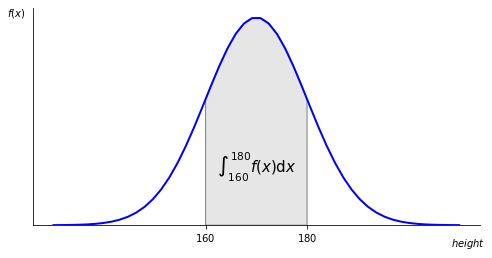

In [84]:
from matplotlib.patches import Polygon
def func(x):
    return heights_rv.pdf(x)
lower_lim = 160
upper_lim = 180
x = np.linspace(130, 210)
y = func(x)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, y, 'blue', linewidth=2)
ax.set_ylim(bottom=0)
# Make the shaded region
ix = np.linspace(lower_lim, upper_lim)
iy = func(ix)
verts = [(lower_lim, 0), *zip(ix, iy), (upper_lim, 0)]
poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
ax.add_patch(poly)
ax.text(0.5 * (lower_lim + upper_lim), 0.01, \
        r"$\int_{160}^{180} f(x)\mathrm{d}x$", \
        horizontalalignment='center', fontsize=15)
fig.text(0.85, 0.05, '$height$')
fig.text(0.08, 0.85, '$f(x)$')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks((lower_lim, upper_lim))
ax.set_xticklabels(('$160$', '$180$'))
ax.set_yticks([])

In [87]:
# limits of the integral
lower_lim = 160
upper_lim = 180
# calculating the area under the curve
Prob_X_in_160_180 = heights_rv.cdf(upper_lim) - \
                    heights_rv.cdf(lower_lim)
# print the result
print(f'Prob(160 <= X <= 180) = {Prob_X_in_160_180:0.4f}')

Prob(160 <= X <= 180) = 0.6827


In [88]:
# limits of the integral
lower_lim = 190
upper_lim = np.Inf # since we are asking X > 190
# calculating the area under the curve
Prob_X_gt_190 = heights_rv.cdf(upper_lim) - \
                heights_rv.cdf(lower_lim)
# print the result
print(f'Probability of a male > 190 cm: {Prob_X_gt_190:0.5f} \
      (or {100*Prob_X_gt_190:0.2f}%)')

Probability of a male > 190 cm: 0.02275       (or 2.28%)


#Use Case Normal Distribution

In [89]:
# producing the normal distribution
X_mean = 100
X_sd = 15
# create the random variable
X_rv = stats.norm(loc = X_mean, scale = X_sd)

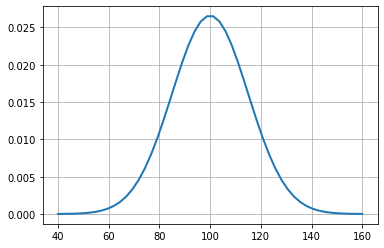

In [93]:
x_values = np.linspace(X_mean - 4 * X_sd, X_mean + 4 * X_sd)
y_values = X_rv.pdf(x_values)
plt.plot(x_values, y_values, lw=2)
plt.grid()

In [94]:
Prob_X_gt_80 = X_rv.cdf(np.Inf) - X_rv.cdf(80)
print(f'Prob(X >= 80): {Prob_X_gt_80:0.5f} \
(or {100*Prob_X_gt_80:0.2f}%)')


Prob(X >= 80): 0.90879 (or 90.88%)


In [95]:
proportion_of_admitted = 0.02
cut_off = X_rv.ppf(1-proportion_of_admitted)
print(f'To admit the top {100*proportion_of_admitted:0.0f}%, \
the cut-off score should be {cut_off:0.1f}')
top_percents = np.arange(0.9, 1, 0.01)

To admit the top 2%, the cut-off score should be 130.8


#Additional Use Case

In [96]:
MSFT = "https://raw.githubusercontent.com/PacktWorkshops/The-Statistics-and-Calculus-with-Python-Workshop/master/Chapter08/data/MSFT.csv"

In [97]:
msft = pd.read_csv(MSFT)
pg = pd.read_csv(PG)

In [98]:
msft.rename(columns=lambda x: x.lower().replace(' ', '_'),\
            inplace=True)

In [99]:
msft['date'] = pd.to_datetime(msft['date'])

In [100]:
msft.set_index('date', inplace = True)


In [101]:
msft['returns'] = msft['adj_close'].pct_change()

In [102]:
msft.head()

,open,high,low,close,adj_close,volume,returns
date,,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,24.360727,38409100,NaN
2010-01-05,30.850000,31.100000,30.639999,30.959999,24.368599,49749600,0.000323
2010-01-06,30.879999,31.080000,30.520000,30.770000,24.219046,58182400,-0.006137
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.967175,50559700,-0.010400
2010-01-08,30.280001,30.879999,30.240000,30.660000,24.132469,51197400,0.006897


In [103]:
start_date = '2014-01-01'
end_date = '2018-12-31'
msft = msft.loc[start_date: end_date]

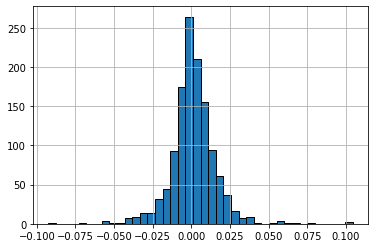

In [104]:
msft['returns'].hist(ec='k', bins=40)

In [105]:
msft['returns'].describe()


count    1258.000000
mean        0.000996
std         0.014591
min        -0.092534
25%        -0.005956
50%         0.000651
75%         0.007830
max         0.104522
Name: returns, dtype: float64

In [106]:
R_mean = msft['returns'].mean()
R_std = msft['returns'].std()
R_rv = stats.norm(loc = R_mean, scale = R_std)

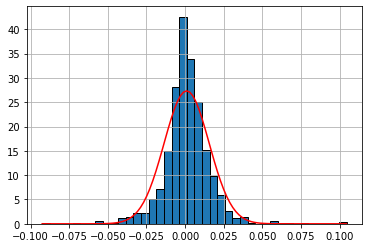

In [109]:
fig, ax = plt.subplots()
ax.hist(x = msft['returns'], ec = 'k', \
        bins = 40, density = True,);
x_values = np.linspace(msft['returns'].min(), \
                       msft['returns'].max(), num=100)
densities = R_rv.pdf(x_values)
ax.plot(x_values, densities, color='r')
ax.grid()